In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Install dependencies jika diperlukan
!pip install opencv-python tensorflow keras

# 2. Upload file zip Anda ke Google Colab terlebih dahulu
# Lalu unzip file tersebut
import zipfile
import os

# Ganti 'your_file.zip' dengan nama file zip yang diupload
zip_path = "/content/drive/MyDrive/BisaAI/datawajah2.zip"
extracted_path = '/content/drive/MyDrive/BisaAI/datakulitwajah'

# Membuka file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Melihat isi folder yang sudah diekstrak
os.listdir(extracted_path)

['test', 'train', 'valid']

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from keras import layers
from glob import glob
import keras

In [ ]:
dataset_path = '/content/drive/MyDrive/BisaAI/datakulitwajah'
test = '/content/drive/MyDrive/BisaAI/datakulitwajah/test'
train = '/content/drive/MyDrive/BisaAI/datakulitwajah/train'
valid = '/content/drive/MyDrive/BisaAI/datakulitwajah/valid'

Found 395 images belonging to 4 classes.
Found 395 images belonging to 4 classes.
Found 395 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4416 - loss: 1.4903
Epoch 1: val_accuracy improved from -inf to 0.67969, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.4483 - loss: 1.4776 - val_accuracy: 0.6797 - val_loss: 0.6856
Epoch 2/10
 1/12 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5312 - loss: 1.1727

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.67969
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.5312 - loss: 1.1727 - val_accuracy: 0.5455 - val_loss: 0.8052
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7285 - loss: 0.7063
Epoch 3: val_accuracy improved from 0.67969 to 0.82292, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.7306 - loss: 0.7002 - val_accuracy: 0.8229 - val_loss: 0.4561
Epoch 4/10
 1/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7188 - loss: 0.8410
Epoch 4: val_accuracy improved from 0.82292 to 1.00000, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7188 - loss: 0.8410 - val_accuracy: 1.0000 - val_loss: 0.1771
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7633 - loss: 0.5469
Epoch 5: val_accuracy did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.7656 - loss: 0.5433 - val_accuracy: 0.8620 - val_loss: 0.3753
Epoch

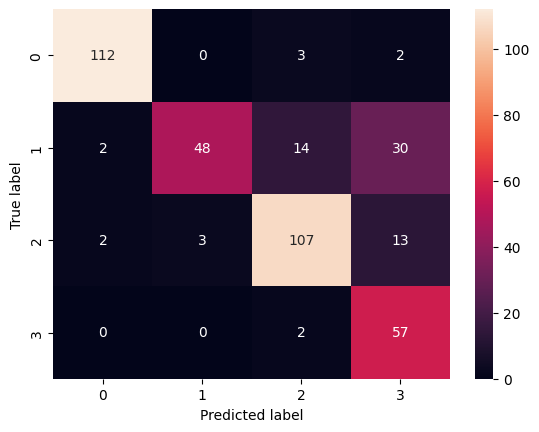

In [ ]:
# prompt: buat model prediksi menggunakan cnn

from google.colab import drive
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from keras import layers
from glob import glob
import keras

dataset_path = '/content/drive/MyDrive/BisaAI/datakulitwajah'
test = '/content/drive/MyDrive/BisaAI/datakulitwajah/test'
train = '/content/drive/MyDrive/BisaAI/datakulitwajah/train'
valid = '/content/drive/MyDrive/BisaAI/datakulitwajah/valid'


# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained MobileNetV2 model (without top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Generate classification report and confusion matrix
print(classification_report(y_true, np.argmax(y_pred, axis=1)))
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/BisaAI/datakulit/trained_model.keras')

print("Model saved to Google Drive successfully!")

Model saved to Google Drive successfully!


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/BisaAI/datakulit/final_skin_type_model.h5')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files  # Pastikan ini diimpor

# Load the trained model
model = load_model('/content/drive/MyDrive/BisaAI/datakulit/final_skin_type_model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Ganti ukuran sesuai dengan yang digunakan saat pelatihan
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi pixel ke rentang [0, 1]
    return img_array

# Function to make predictions
def predict_skin_type(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(processed_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the predicted class index to the corresponding skin type label
    class_labels = ['berjerawat', 'berminyak', 'kering', 'normal']  # Update this based on your class order
    predicted_label = class_labels[predicted_class_index]

    # Output the result
    return predicted_label, predictions

# Upload file using Google Colab
uploaded = files.upload()

# Get the uploaded file name
image_path = next(iter(uploaded))  # Ambil nama file yang diupload

try:
    # Make the prediction
    predicted_label, prediction_scores = predict_skin_type(image_path)

    # Display the result
    print(f'Predicted Skin Type: {predicted_label}')
    print(f'Prediction Scores: {prediction_scores}')

    # Optional: Display the image
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

except Exception as e:
    print(f'Terjadi kesalahan: {e}')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,980 (9.24 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

Found 318 images belonging to 4 classes.
Found 77 images belonging to 4 classes.


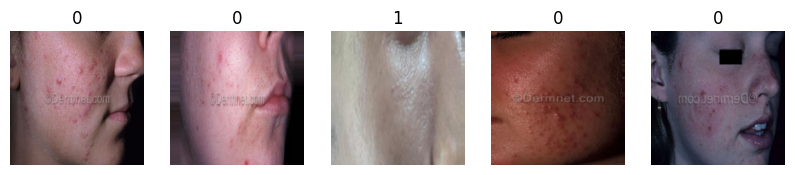

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3693 - loss: 1.5952
Epoch 1: val_accuracy improved from -inf to 0.58442, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3766 - loss: 1.5841 - val_accuracy: 0.5844 - val_loss: 0.9999
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6449 - loss: 0.9171
Epoch 2: val_accuracy improved from 0.58442 to 0.61039, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.6455 - loss: 0.9146 - val_accuracy: 0.6104 - val_loss: 0.9502
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7360 - loss: 0.6253
Epoch 3: val_accuracy improved from 0.61039 to 0.62338, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7357 - loss: 0.6257 - val_accuracy: 0.6234 - val_loss: 0.9133
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7880 - loss: 0.5750
Epoch 4: val_accuracy did not improve from 0.62338
10/10 ━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define data augmentation with validation split
datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Load the base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model initially

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(4, activation='softmax')(x)  # Output 4 classes for skin types

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/BisaAI/datakulitwajah/train',  # Change to your training path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/BisaAI/datakulitwajah/valid',  # Change to your validation path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Visualizing a batch of training images and their labels
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))  # Display class
    plt.axis('off')
plt.show()

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Adjust epochs based on performance
    callbacks=[checkpoint, early_stop]
)

# Optionally, unfreeze some layers of the base model and retrain for fine-tuning
base_model.trainable = True
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=validation_generator, epochs=20, callbacks=[checkpoint, early_stop])


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again for fine-tuning
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Fine-tuning for fewer epochs
    callbacks=[checkpoint, early_stop]
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8467 - loss: 0.4001
Epoch 1: val_accuracy did not improve from 0.84416
10/10 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.8463 - loss: 0.4032 - val_accuracy: 0.8052 - val_loss: 0.6145
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8543 - loss: 0.4414
Epoch 2: val_accuracy did not improve from 0.84416
10/10 ━━━━━━━━━━━━━━━━━━━━ 155s 10s/step - accuracy: 0.8524 - loss: 0.4424 - val_accuracy: 0.8312 - val_loss: 0.4294
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8472 - loss: 0.4172
Epoch 3: val_accuracy did not improve from 0.84416
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8479 - loss: 0.4125 - val_accuracy: 0.7273 - val_loss: 0.6573
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8497 - loss: 0.3436
Epoch 4: val_accuracy did not improve from 0.84416
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 8s/step - accuracy: 0.8500 - loss: 0.3452 - val_accuracy: 0.7922 - val_loss: 0.5767
E

In [ ]:
# Assuming you have a separate test directory
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BisaAI/datakulitwajah/test',  # Change to your test path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Found 395 images belonging to 4 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9419 - loss: 0.1714
Test Loss: 0.1855466663837433, Test Accuracy: 0.9367088675498962


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


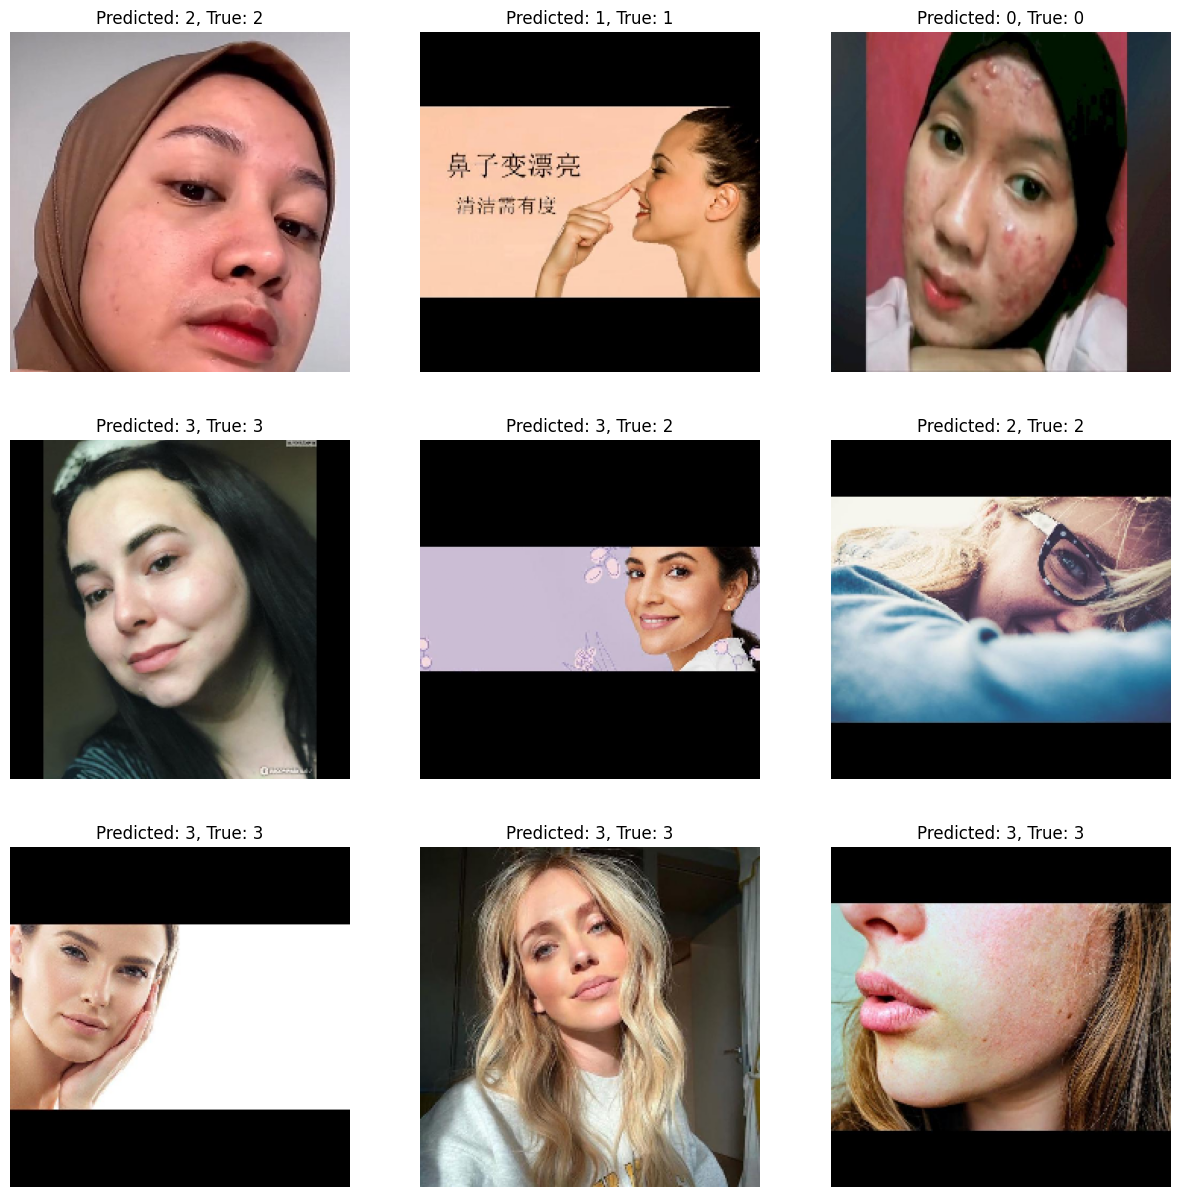

In [ ]:
# Visualize predictions
x_test_batch, y_test_batch = next(test_generator)
predictions = model.predict(x_test_batch)

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test_batch[i])
    plt.title(f'Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test_batch[i])}')
    plt.axis('off')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step


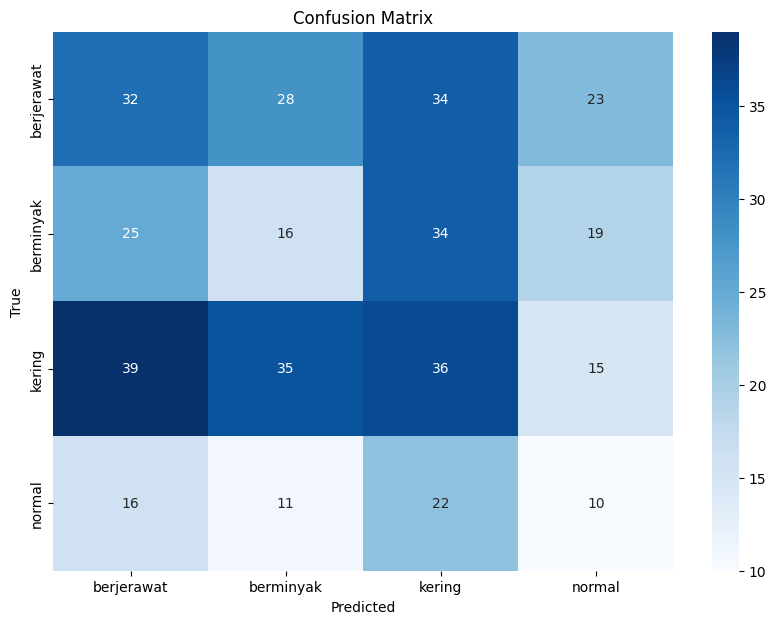

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions
true_labels = test_generator.classes
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_save_path = '/content/drive/MyDrive/BisaAI/datakulit/final_skin.h5'
model.save(model_save_path)

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/BisaAI/datakulit/final_skin_type_model.h5')


Saving Untitled-design-16.png to Untitled-design-16.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Skin Type: berminyak
Prediction Scores: [[0.00171045 0.7287434  0.23623466 0.0333115 ]]


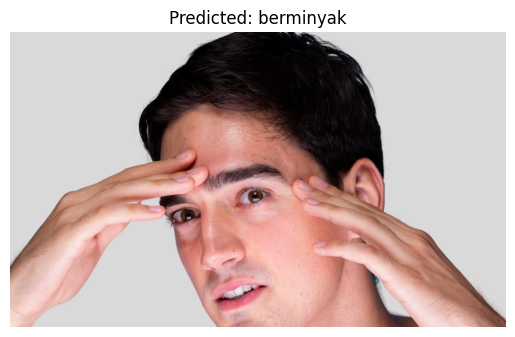

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/BisaAI/datakulit/final_skin_type_model.h5')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files  # Pastikan ini diimpor

# Load the trained model
model = load_model('/content/drive/MyDrive/BisaAI/datakulit/final_skin_type_model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # Ganti ukuran sesuai dengan yang digunakan saat pelatihan
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi pixel ke rentang [0, 1]
    return img_array

# Function to make predictions
def predict_skin_type(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(processed_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the predicted class index to the corresponding skin type label
    class_labels = ['berjerawat', 'berminyak', 'kering', 'normal']  # Update this based on your class order
    predicted_label = class_labels[predicted_class_index]

    # Output the result
    return predicted_label, predictions

# Upload file using Google Colab
uploaded = files.upload()

# Get the uploaded file name
image_path = next(iter(uploaded))  # Ambil nama file yang diupload

try:
    # Make the prediction
    predicted_label, prediction_scores = predict_skin_type(image_path)

    # Display the result
    print(f'Predicted Skin Type: {predicted_label}')
    print(f'Prediction Scores: {prediction_scores}')

    # Optional: Display the image
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

except Exception as e:
    print(f'Terjadi kesalahan: {e}')
